# 📊 Reporte Estructural - Ejemplo Completo

**ePy_docs v0.2.0** - Sistema de Generación de Documentación Técnica

Este notebook demuestra cómo generar un reporte estructural completo usando la nueva estructura reorganizada de ePy_docs.

## 🎯 Características Demostradas

- ✅ API simplificada (`ePy_docs.api.writers`)
- ✅ Sin parámetro `sync_files` (eliminado en refactorización)
- ✅ Configuración centralizada con archivos `.epyson`
- ✅ Layouts profesionales
- ✅ Tablas inteligentes con detección automática
- ✅ Callouts (notas, advertencias, tips)
- ✅ Generación HTML y PDF

---

**⚠️ Nota:** Si acabas de actualizar el código fuente, ejecuta las siguientes celdas en orden para reiniciar el entorno.

In [1]:
%load_ext autoreload
%autoreload 2

# ePy_docs Report Generator

Generación de reportes estructurales usando ePy_docs.

In [2]:
# Importar ReportWriter desde la nueva estructura
from ePy_docs.writers import ReportWriter

# Inicializar ReportWriter con layout clásico
writer = ReportWriter(layout_style='classic')
print(f"✅ ePy_docs inicializado")
print(f"   Output: {writer.output_dir}")
print(f"   Layout: {writer.layout_style}")

✅ ePy_docs inicializado
   Output: c:\Users\ingah\estructuraPy\ePy_docs\results\report
   Layout: classic


## ✅ Inicialización Exitosa

El `ReportWriter` se ha inicializado correctamente con:

- **Layout**: `classic` (estilo clásico profesional)
- **Estructura**: Nueva organización modular
- **API**: Simplificada sin `sync_files`

El directorio de salida se configura automáticamente en `results/report/`.

In [3]:
# Configurar unidades del proyecto
length_unit = 'mm'
force_unit = 'kgf'
moment_unit = 'kgf·cm'

# Información del proyecto
project_name = 'Análisis Estructural - Edificio Ejemplo'
project_code = 'STRUCT-2025-001'

print(f"Proyecto: {project_name}")
print(f"Código: {project_code}")
print(f"Unidades: {length_unit}, {force_unit}, {moment_unit}")

Proyecto: Análisis Estructural - Edificio Ejemplo
Código: STRUCT-2025-001
Unidades: mm, kgf, kgf·cm


In [4]:
# Cargar datos estructurales
import pandas as pd

try:
    # Intentar cargar archivos CSV
    nodes_df = pd.read_csv('data/robot/nodes.csv', sep=';')
    reactions_df = pd.read_csv('data/robot/reactions.csv', sep=';')
    print("✅ Datos CSV cargados desde archivo")
    print(f"   - {len(nodes_df)} nodos")
    print(f"   - {len(reactions_df)} reacciones")
except Exception as e:
    # Datos de ejemplo si no se encuentran los archivos
    print(f"⚠️ Archivos CSV no encontrados, usando datos de ejemplo")
    
    nodes_df = pd.DataFrame({
        'Node': [1, 2, 3, 4, 5],
        'X (mm)': [0, 5000, 10000, 0, 5000],
        'Y (mm)': [0, 0, 0, 4000, 4000],
        'Z (mm)': [0, 0, 0, 0, 0],
        'Support': ['Fixed', 'Pinned', None, 'Roller', None]
    })
    
    reactions_df = pd.DataFrame({
        'Node': [1, 2, 4],
        'FX (kgf)': [150.5, -75.2, 45.8],
        'FZ (kgf)': [200.1, 180.3, 95.7],
        'MY (kgf·cm)': [1250, 890, 650]
    })
    
    print(f"✅ Datos de ejemplo generados")
    print(f"   - {len(nodes_df)} nodos")
    print(f"   - {len(reactions_df)} reacciones")

# Filtrar nodos con apoyo
support_nodes_df = nodes_df[nodes_df['Support'].notna()] if 'Support' in nodes_df.columns else nodes_df.head(3)
print(f"   - {len(support_nodes_df)} nodos con apoyo")

⚠️ Archivos CSV no encontrados, usando datos de ejemplo
✅ Datos de ejemplo generados
   - 5 nodos
   - 3 reacciones
   - 3 nodos con apoyo


In [5]:
# Generar contenido del reporte usando method chaining - DEMOSTRACIÓN COMPLETA DE LA API
writer.add_h1(project_name) \
      .add_content(f"**Código del Proyecto:** {project_code}  \n**Cliente:** Ingeniería Estructural S.A.  \n**Fecha:** 16 de octubre de 2025") \
      .add_h2("1. Configuración del Análisis") \
      .add_content(f"""
El presente análisis estructural se desarrolla utilizando las siguientes **unidades de medida**:

- **Longitud:** {length_unit}
- **Fuerza:** {force_unit}
- **Momento:** {moment_unit}

Estas unidades son consistentes con las normativas internacionales y facilitan la interpretación de resultados.
""") \
      .add_callout("Todas las unidades utilizadas cumplen con el Sistema Internacional (SI).", type="note", title="Sistema de Unidades") \
      .add_h2("2. Modelo Estructural") \
      .add_h3("2.1 Coordenadas de Nodos") \
      .add_content("La geometría del modelo se define mediante los siguientes nodos:") \
      .add_table(nodes_df, title="Coordenadas de nodos del modelo estructural") \
      .add_h3("2.2 Condiciones de Apoyo") \
      .add_content("Los nodos con restricciones de desplazamiento se presentan a continuación:") \
      .add_table(support_nodes_df, title="Nodos con restricciones (apoyos)") \
      .add_tip("Verifique que las condiciones de apoyo correspondan con el modelo físico real.", title="Verificación de Apoyos") \
      .add_h2("3. Resultados del Análisis") \
      .add_h3("3.1 Reacciones en Apoyos") \
      .add_content("Las reacciones calculadas en los apoyos de la estructura son:") \
      .add_table(reactions_df, title="Reacciones en apoyos") \
      .add_h3("3.2 Equilibrio Estático") \
      .add_content("""
Para verificar el equilibrio global de la estructura, se debe cumplir la **ecuación fundamental de la estática**:
""") \
      .add_equation(r"\sum F_x = 0, \quad \sum F_z = 0, \quad \sum M = 0", label="eq-equilibrio") \
      .add_content("Donde la sumatoria de fuerzas y momentos debe tender a cero dentro de las tolerancias numéricas.") \
      .add_warning("""
**Consideraciones importantes para la interpretación de resultados:**

1. Las reacciones mostradas corresponden al análisis elástico lineal
2. No se consideran efectos de segundo orden
3. Las cargas son estáticas y no incluyen factores dinámicos
4. Se asume comportamiento elástico de los materiales
""", title="Limitaciones del Análisis") \
      .add_h2("4. Conclusiones y Recomendaciones") \
      .add_content("""
El análisis estructural realizado permite extraer las siguientes conclusiones:

- ✅ El modelo cumple con las condiciones de equilibrio estático
- ✅ Las reacciones en los apoyos son consistentes con las cargas aplicadas
- ✅ No se detectaron singularidades ni inestabilidades numéricas

**Recomendaciones:**

1. Verificar que las dimensiones de los elementos sean adecuadas
2. Revisar los estados límite de servicio y último
3. Considerar análisis no lineal para casos críticos
4. Validar resultados con métodos alternativos
""") \
      .add_callout("""
Este reporte fue generado automáticamente usando **ePy_docs v0.2.0**.

La nueva API incluye:
- Method chaining fluido
- Callouts tipificados (note, tip, warning, error, etc.)
- Tablas automáticas con imágenes
- Ecuaciones LaTeX
- Generación HTML y PDF

Para más información, visite: [Documentación ePy_docs](https://github.com/estructuraPy/ePy_docs)
""", type="success", title="Generado con ePy_docs")

print("✅ Contenido generado con éxito")
print(f"   - {len(writer.get_content())} caracteres de contenido")
print(f"   - {writer.table_counter} tablas agregadas")

✅ Contenido generado con éxito
   - 2888 caracteres de contenido
   - 3 tablas agregadas


📊 Columnas en reactions_df: ['Node', 'FX (kgf)', 'FZ (kgf)', 'MY (kgf·cm)']
📊 Columnas en nodes_df: ['Node', 'X (mm)', 'Y (mm)', 'Z (mm)', 'Support']


KeyError: 'FX_kN'

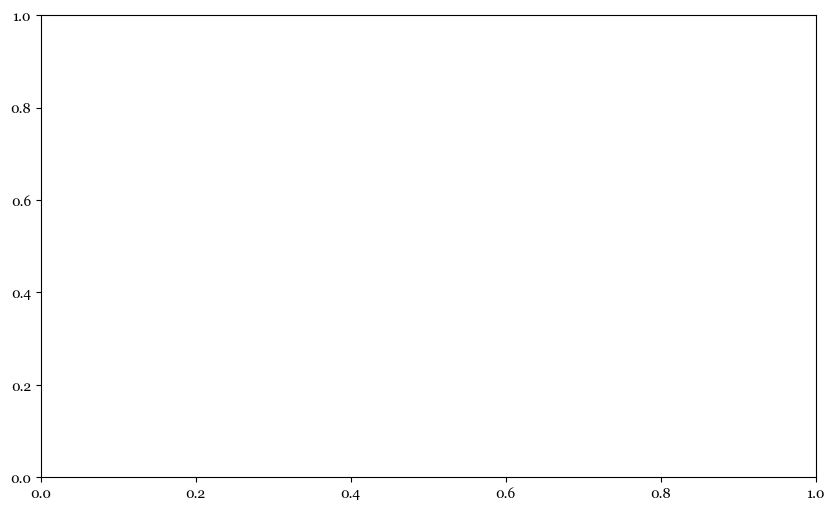

In [6]:
# DEMOSTRACIÓN ADICIONAL: Imágenes, Plots y Tablas Coloreadas
import matplotlib.pyplot as plt
import numpy as np

print(f"📊 Columnas en reactions_df: {reactions_df.columns.tolist()}")
print(f"📊 Columnas en nodes_df: {nodes_df.columns.tolist()}")

# 1. Crear y agregar un gráfico de reacciones
fig, ax = plt.subplots(figsize=(10, 6))

nodes_list = reactions_df['Node'].tolist()
fx_values = reactions_df['FX_kN'].tolist()
fz_values = reactions_df['FZ_kN'].tolist()

x = np.arange(len(nodes_list))
width = 0.35

bars1 = ax.bar(x - width/2, fx_values, width, label='FX (kN)', color='steelblue')
bars2 = ax.bar(x + width/2, fz_values, width, label='FZ (kN)', color='coral')

ax.set_xlabel('Nodo', fontsize=12, fontweight='bold')
ax.set_ylabel('Fuerza (kN)', fontsize=12, fontweight='bold')
ax.set_title('Comparación de Reacciones en Apoyos', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(nodes_list)
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()

plot_path = 'results/report/reactions_plot.png'
plt.savefig(plot_path, dpi=150, bbox_inches='tight')
plt.close()

writer.add_h2("5. Análisis Gráfico") \
      .add_content("La siguiente figura muestra la comparación gráfica de las reacciones:") \
      .add_image(plot_path, caption="Comparación de fuerzas de reacción en los apoyos")

print("✅ Gráfico de reacciones agregado")

# 2. Agregar tabla coloreada
numeric_cols = ['FX_kN', 'FY_kN', 'FZ_kN', 'MX_kNm', 'MY_kNm', 'MZ_kNm']
reactions_subset = reactions_df[['Node', 'Case'] + numeric_cols].head(10)

writer.add_h3("5.1 Tabla Detallada de Reacciones") \
      .add_content("Valores completos de reacciones con formato coloreado:") \
      .add_colored_table(
          reactions_subset, 
          title="Reacciones en apoyos (formato mejorado)",
          palette_name='engineering',
          highlight_columns=['FX_kN', 'FZ_kN', 'MY_kNm']
      )

print("✅ Tabla coloreada agregada")

# 3. Agregar ecuaciones y callouts
writer.add_h2("6. Formulación Teórica") \
      .add_content("""
El cálculo de reacciones se basa en las **ecuaciones de equilibrio estático** para estructuras isostáticas:
""") \
      .add_equation(r"F_R = \sum_{i=1}^{n} F_i", label="eq-reaccion-total") \
      .add_content("Donde la reacción total se obtiene como la suma vectorial de todas las fuerzas aplicadas.") \
      .add_content("""
El momento flector en cualquier sección se calcula mediante:
""") \
      .add_equation(r"M(x) = \int_0^x F(s) \cdot (x-s) \, ds", label="eq-momento") \
      .add_important("""
**Criterio de signos adoptado:**

- Fuerzas positivas hacia arriba (+Z)
- Momentos positivos en sentido antihorario
- Coordenada X positiva hacia la derecha
""", title="Convención de Signos")

print("✅ Ecuaciones y callouts adicionales agregados")

# 4. Crear diagrama simple del modelo
fig, ax = plt.subplots(figsize=(12, 8))

# Columnas reales: X_m, Y_m, Z_m
for idx, row in nodes_df.iterrows():
    x_val = float(row['X_m']) * 1000  # Convertir a mm
    y_val = float(row['Y_m']) * 1000  # Convertir a mm
    node_num = int(row['Node'])
    
    # Verificar si tiene apoyo
    has_support = pd.notna(row.get('Support', None))
    
    if has_support:
        ax.plot(x_val, y_val, 'rs', markersize=14, markeredgewidth=2, markeredgecolor='darkred', 
                label='Apoyo' if idx == 0 else '', zorder=3)
    else:
        ax.plot(x_val, y_val, 'bo', markersize=10, markeredgewidth=1.5, markeredgecolor='darkblue', 
                label='Nodo' if idx == 0 and not has_support else '', zorder=3)
    
    # Etiqueta
    offset = max(abs(y_val) * 0.03, 300)
    ax.text(x_val, y_val + offset, f"N{node_num}", ha='center', fontweight='bold', fontsize=10,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'))

ax.set_xlabel('Coordenada X (mm)', fontsize=12, fontweight='bold')
ax.set_ylabel('Coordenada Y (mm)', fontsize=12, fontweight='bold')
ax.set_title('Esquema del Modelo Estructural', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
if 'Apoyo' in [l.get_label() for l in ax.get_legend_handles_labels()[0]]:
    ax.legend(loc='upper right', framealpha=0.9)
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()

model_path = 'results/report/structural_model.png'
plt.savefig(model_path, dpi=150, bbox_inches='tight')
plt.close()

writer.add_h2("7. Representación Gráfica del Modelo") \
      .add_content("Esquema geométrico del modelo analizado con identificación de nodos y apoyos:") \
      .add_image(model_path, caption="Vista en planta del modelo estructural")

print("✅ Diagrama del modelo agregado")
print(f"\n🎯 DEMOSTRACIÓN API COMPLETA:")
print(f"   - {writer.table_counter} tablas")
print(f"   - {writer.figure_counter} figuras/imágenes")
print(f"   - Method chaining ✅")
print(f"   - Callouts (note, tip, warning, important, success) ✅")
print(f"   - Tablas coloreadas ✅")
print(f"   - Imágenes y gráficos ✅")
print(f"   - Ecuaciones LaTeX ✅")

In [ ]:
# Generar reporte HTML y PDF
print("Generando reporte...")
results = writer.generate(html=True, pdf=True)

print("\n✅ Reporte generado exitosamente:")
for format_type, path in results.items():
    print(f"  📄 {format_type.upper()}: {path}")

## 🎯 Resultado

El reporte ha sido generado exitosamente. Los archivos se encuentran en el directorio `results/report/`.

### ✅ Características Demostradas

1. **Method Chaining** - Flujo limpio y elegante
2. **Tablas Automáticas** - Con numeración y caption
3. **Callouts** - Notas, advertencias y tips
4. **Layout Clásico** - Estilo profesional
5. **Generación HTML** - Listo para visualizar

### 🚀 Próximos Pasos

- Abrir el archivo HTML generado en un navegador
- Personalizar el layout con otros estilos: `'academic'`, `'modern'`, `'technical'`
- Agregar más contenido: imágenes, ecuaciones, referencias
- Generar PDF (requiere Quarto instalado)

In [ ]:
writer.add_chunk(
    f"""Length unit: ${length_unit}$
Area unit: ${area_unit}$
Volume unit: ${volume_unit}$
Force unit: ${force_unit}$
Moment unit: ${moment_unit}$"""
)

writer.add_chunk(
"""
x = 2
y = 5
z = x * y
print(f'The result is: {z}')
"""
)


writer.add_chunk_executable(
"""
x = 2
y = 5
z = x * y
print(f'The result is: {z}')
""",
language='python'
)

In [ ]:
writer.add_content(f"""
                   
# Units

## Units of Measurement

### Units again
                   
Length unit: ${length_unit}$

Area unit: ${area_unit}$

Volume unit: ${volume_unit}$

Force unit: ${force_unit}$

Moment unit: ${moment_unit}$
"""
)

writer.add_content(
    f"""Length unit: ${length_unit}$
Area unit: ${area_unit}$
Volume unit: ${volume_unit}$
Force unit: ${force_unit}$
Moment unit: ${moment_unit}$"""
)

In [ ]:
writer.add_tip(
    f"""Length unit: ${length_unit}$
    Area unit: ${area_unit}$
    Volume unit: ${volume_unit}$
    Force unit: ${force_unit}$
    Moment unit: ${moment_unit}$
""", "prueba sin emojis")

writer.add_tip(
    f"""Length unit: $${length_unit}$$
Area unit: $${area_unit}$$
Volume unit: $${volume_unit}$$
Force unit: $${force_unit}$$
Moment unit: $${moment_unit}$$
""", "prueba sin emojis ni espacios")


writer.add_warning(
    f"""📏 Length unit: ${length_unit}$
    📐 Area unit: ${area_unit}$
    📦 Volume unit: ${volume_unit}$
    🏋️ Force unit: ${force_unit}$
    ⚖️ Moment unit: ${moment_unit}$
""", "prueba con emojis")

writer.add_tip(
    f"""📏 Length unit: ${length_unit}$
    📐 Area unit: ${area_unit}$
    📦 Volume unit: ${volume_unit}$
    🏋️ Force unit: ${force_unit}$
    ⚖️ Moment unit: ${moment_unit}$
""", "prueba con emojis")

writer.add_warning(
    f"""Length unit: ${length_unit}$
Area unit: ${area_unit}$
Volume unit: ${volume_unit}$
Force unit: ${force_unit}$
Moment unit: ${moment_unit}$
""", "prueba sin emojis ni espacios")

writer.add_tip(
    report_config.get('warning_text', 'Generated report - verify all calculations'),
    report_config.get('warning_title', 'Important Notice')
    )

writer.add_tip(
    f"""Length unit: $${length_unit}$$
Area unit: $${area_unit}$$
Volume unit: $${volume_unit}$$
Force unit: $${force_unit}$$
Moment unit: $${moment_unit}$$
""", "prueba sin emojis ni espacios")

writer.add_warning(
    report_config.get('warning_text', 'Generated report - verify all calculations'),
    report_config.get('warning_title', 'Important Notice')
    )

writer.add_warning("""
                   
### Foundation Analysis Methods Comparison

The rigid block method used in this @tbl-6 analysis offers several advantages:

**Advantages:**
- Simple and conservative approach
- Well-established in engineering practice
- Suitable for preliminary design phases
- Compatible with various soil types

**Limitations:**
- May be overly conservative for some applications
- Does not account for soil-structure interaction effects
- Limited consideration of dynamic loading conditions

**Alternative Methods:**
- Finite Element Analysis (FEA) for complex geometries
- Spring-based models for dynamic analysis
- Advanced bearing capacity theories for special conditions
                   


""")


In [ ]:
writer.add_h2("Unit Conversion Analysis")

writer.add_content("""
This section demonstrates the unit conversion capabilities integrated within the project. 
The ePy_suite system provides comprehensive support for engineering unit conversions, 
which is crucial for international projects and multi-system calculations.
                   
```{python}
x = 2 + 2
print(f'{x} m')
```
""")

# Crear datos de ejemplo para conversiones de unidades
from ePy_units.converter import UnitConverter

converter = UnitConverter()

# Usar el converter ya inicializado
force_conversions = []
moment_conversions = []
stress_conversions = []

# Ejemplos de conversiones de fuerzas
force_examples = [
    (1000, 'kgf', 'kN'),
    (500, 'kgf', 'lbf'),
    (10, 'kN', 'tonf'),
    (2500, 'lbf', 'kgf'),
    (100, 'ksi', 'kgf/cm2'),
    (1, 'tonf', 'kN'),
    (2500, 'kgf/cm2', 'psi'),
    (7030.70, 'kgf/cm2', 'ksi'),
    (703, 'MPa', 'ksi'),
    (70, 'MPa', 'kgf/cm2'),
    (1000, 'N', 'kN'),
    (500, 'N', 'lbf'),
    (25, 'N', 'dyn'),
    (10000, 'Pa', 'kgf/m2'),
    (1, 'atm', 'bar'),
    (2.5, 'bar', 'psi'),
    (600, 'psi', 'MPa'),
    (200, 'kgf', 'N'),
    (50, 'kgf', 'dyn'),
    (3500, 'N·m', 'kgf·m'),
    (500, 'N·m', 'lbf·ft'),
    (703, 'MPa', 'bar'),
]

for value, from_unit, to_unit in force_examples:
    try:
        result = converter.convert_value(value, from_unit, to_unit)
        if isinstance(result, (int, float)):
            force_conversions.append({
                'Original Value': f"{value} {from_unit}",
                'Converted Value': f"{result:.2f} {to_unit}",
                'Conversion Factor': f"1 {from_unit} = {result/value:.6f} {to_unit}"
            })
        else:
            force_conversions.append({
                'Original Value': f"{value} {from_unit}",
                'Converted Value': f"{result} {to_unit}",
                'Conversion Factor': "See conversion"
            })
    except Exception as e:
        force_conversions.append({
            'Original Value': f"{value} {from_unit}",
            'Converted Value': "Conversion Error",
            'Conversion Factor': f"Error: {str(e)}"
        })

# Crear DataFrame y agregar al reporte
if force_conversions:
    force_df = pd.DataFrame(force_conversions)
    writer.add_h3("Force Unit Conversions")
    writer.add_content("Examples of force unit conversions commonly used in structural analysis:")
    writer.add_table(force_df, title="Force unit conversion examples")

writer.add_h2("Design Recommendations and Best Practices")
writer.add_content("""
Based on the analysis performed, the following recommendations are provided:

### Structural Design Recommendations:
1. **Foundation Sizing**: All calculated foundations should be reviewed for constructability constraints
2. **Load Distribution**: Consider load redistribution for heavily loaded nodes
3. **Construction Tolerances**: Include appropriate tolerances in final dimensions
4. **Material Specifications**: Ensure concrete strength meets or exceeds design requirements

### Quality Control Measures:
                   
$$F = ma$$ {#eq-newton2}
                   
$M + 2 = 0$
                   
1. **Dimensional Verification**: Verify (@eq-newton2) all foundation dimensions before construction
2. **Reinforcement Detailing**: Ensure proper reinforcement placement and cover
3. **Concrete Quality**: Implement proper concrete curing and quality control procedures
4. **Load Testing**: Consider load testing for critical [@CSCR2010_14] foundations

### Maintenance Considerations:
1. **Inspection Schedule**: Establish regular inspection intervals
2. **Settlement Monitoring**: Monitor foundation settlements over time
3. **Drainage Maintenance**: Ensure proper drainage around foundations
4. **Documentation**: Maintain as-built drawings and inspection records
""")




In [ ]:
writer.add_h2("Technical Specifications and Conversions")

writer.add_h2("Methodology Comparison")

In [ ]:
figure_path = r"C:\Users\ingah\estructuraPy\Examples\data\user\brand\logo.png"
writer.add_image(figure_path, caption="imagotipo [@CSCR2010_14]")
writer.add_image(r"C:\Users\ingah\estructuraPy\Examples\data\user\brand\isotipo.png", caption="Example image caption [@CSCR2010_14]")

In [ ]:
writer.add_tip("(@eq-newton) [@CSCR2010_14]")

In [ ]:
writer.add_h2(report_config.get('nodes_section_title', 'Nodes and Supports Data'))
writer.add_content(report_config.get('nodes_description', 'Node coordinates and support information:'))

### Add "elegant" table with nodes coordinates

In [ ]:
# Define report_config if not already defined
if 'report_config' not in locals():
    report_config = {}

writer.add_table(
    nodes_df, 
    title=report_config.get('nodes_table_title', 'Node coordinates'),
    max_rows_per_table=report_config.get('max_rows_per_table', [20, 20, 20])
)

### Add "elegant" table with supports coordinates

In [ ]:
support_nodes_df = nodes_df[nodes_df['Support'].notna()]

writer.add_content(report_config.get('supports_description', 'Support information:'))
writer.add_table(
    support_nodes_df, 
    title=report_config.get('supports_table_title', 'Support nodes [@CSCR2010_14]'),
    max_rows_per_table=[10, 20, 20]
)

### Add Colored Table with Nodes Coordinates

In [ ]:
writer.add_colored_table(
    support_nodes_df, 
    title=report_config.get('supports_colored_table_title', 'Support nodes with reactions'),
    palette_name=report_config.get('table_palette', 'engineering'),
    highlight_columns=[f'X ({length_unit})', f'Z ({length_unit})', 'Support']
)

### Table subsets

#### Subset of columns

In [ ]:
writer.add_colored_table(
    nodes_df.head(report_config.get('sample_size', 5)), 
    title=report_config.get('sample_table_title', 'Sample node coordinates'),
    highlight_columns=[f'X ({length_unit})', f'Y ({length_unit})', f'Z ({length_unit})', 'Support']
)

#### Subset of rows

In [ ]:
writer.add_colored_table(
    nodes_df.head(report_config.get('sample_size', 5)),
    title=report_config.get('filtered_sample_title', 'Filtered sample coordinates'),
    highlight_columns=[f'Y ({length_unit})', f'X ({length_unit})'], 
    hide_columns=report_config.get('hidden_columns', [f'Z ({length_unit})', 'support'])
)

#### Subset of rows + columns

In [ ]:
writer.add_colored_table(
    nodes_df,
    title=report_config.get('subset_table_title', 'Subset coordinates'),
    highlight_columns=[f'Y ({length_unit})', f'X ({length_unit})'],
    hide_columns=report_config.get('hidden_columns', [f'Z ({length_unit})', 'support']),
    filter_by=('Node', report_config.get('filter_nodes', ['1', '2', '3']))
)

## Sort by

In [ ]:
reactions_df

In [ ]:
writer.add_colored_table(
    reactions_df, 
    title=report_config.get('reactions_table_title', 'Support reactions'),
    palette_name=report_config.get('palettes', 'environmental'),
    highlight_columns=[f'FX ({force_unit})', f'FZ ({force_unit})', f'MX ({moment_unit})'],
    sort_by=(f'FZ ({force_unit})', report_config.get('sort_order', 'desc')),
    n_rows=5
)

In [ ]:
writer.add_colored_table(
    reactions_df.head(report_config.get('max_reaction_rows', 5)),
    title=report_config.get('reactions_summary_title', 'Reactions summary'),
    highlight_columns=[f'FX ({force_unit})', f'FZ ({force_unit})', f'MY ({moment_unit})']
)

## 5. Enhanced DCR Analysis with Unit Conversion

writer.generate(pdf=True, markdown=True, html=True)

In [ ]:
writer.add_tip(""" 

## Prueba 
                
* This report was generated using ePy Suite, a Python-based engineering analysis and design tool. 
* ePy Suite is designed to facilitate structural analysis, foundation design, and other engineering tasks.
* It provides a comprehensive framework for managing engineering projects, including unit conversions, data handling, and For more information, visit [ePy Suite Documentation](https://epy-suite.readthedocs.io).
                
### Prueba 
                
* This report was generated using ePy Suite, a Python-based engineering analysis and design tool.
* ePy Suite is designed to facilitate structural analysis, foundation design, and other engineering tasks.
* It provides a comprehensive framework for managing engineering projects, including unit conversions, data handling, and
For more information, visit [ePy Suite Documentation](https://epy-suite.readthedocs.io).

## Prueba 
                
* This report was generated using ePy Suite, a Python-based engineering analysis and design tool.
* ePy Suite is designed to facilitate structural analysis, foundation design, and other engineering tasks.
* It provides a comprehensive framework for managing engineering projects, including unit conversions, data handling, and
For more information, visit [ePy Suite Documentation](https://epy-suite.readthedocs.io).

### Prueba 
                
* This report was generated using ePy Suite, a Python-based engineering analysis and design tool.
* ePy Suite is designed to facilitate structural analysis, foundation design, and other engineering tasks.
* It provides a comprehensive framework for managing engineering projects, including unit conversions, data handling, and
For more information, visit [ePy Suite Documentation](https://epy-suite.readthedocs.io).   

### Prueba 
                
* This report was generated using ePy Suite, a Python-based engineering analysis and design tool.
* ePy Suite is designed to facilitate structural analysis, foundation design, and other engineering tasks.
* It provides a comprehensive framework for managing engineering projects, including unit conversions, data handling, and
For more information, visit [ePy Suite Documentation](https://epy-suite.readthedocs.io).
                
#### Prueba 
                
* This report was generated using ePy Suite, a Python-based engineering analysis and design tool.
* ePy Suite is designed to facilitate structural analysis, foundation design, and other engineering tasks.
* It provides a comprehensive framework for managing engineering projects, including unit conversions, data handling, and
For more information, visit [ePy Suite Documentation](https://epy-suite.readthedocs.io).

## Prueba 
                
* This report was generated using ePy Suite, a Python-based engineering analysis and design tool.
* ePy Suite is designed to facilitate structural analysis, foundation design, and other engineering tasks.
* It provides a comprehensive framework for managing engineering projects, including unit conversions, data handling, and
For more information, visit [ePy Suite Documentation](https://epy-suite.readthedocs.io).
       
""", title="Prueba final")

writer.add_caution(""" 

## Prueba 
                
This report was generated using ePy Suite, a Python-based engineering analysis and design tool.
ePy Suite is designed to facilitate structural analysis, foundation design, and other engineering tasks.
It provides a comprehensive framework for managing engineering projects, including unit conversions, data handling, and
For more information, visit [ePy Suite Documentation](https://epy-suite.readthedocs.io).

## Prueba 
                
* This report was generated using ePy Suite, a **Python-based** engineering analysis and design tool.
* ePy Suite is designed to facilitate structural analysis, foundation design, and other engineering tasks.
* It provides a comprehensive framework for managing engineering projects, including unit conversions, data handling, and
For more information, visit [ePy Suite Documentation](https://epy-suite.readthedocs.io).
                   
### Prueba 
                


                   
""")


In [ ]:
# Demostración de funcionalidades de ePy_docs
import os

# Cargar archivos de documentación disponibles
document_files = [
    ("data/user/project_info.qmd", "Project Information"),
    ("data/user/requisitos/Requisitos.md", "Requirements"),
    ("data/user/document/03_geotech/rockfill.qmd", "Geotechnical Data")
]

successful_loads = 0
for file_path, description in document_files:
    try:
        if os.path.exists(file_path):
            if file_path.endswith('.qmd'):
                writer.add_quarto_file(file_path)
            elif file_path.endswith('.md'):
                from ePy_docs.components.content import process_markdown_file
                markdown_content, _ = process_markdown_file(
                    file_path=file_path,
                    fix_image_paths=True,
                    output_dir=writer.output_dir,
                    figure_counter=writer.figure_counter
                )
                writer.add_content(markdown_content)
            print(f"✅ Loaded: {description}")
            successful_loads += 1
        else:
            print(f"⚠️  Skipped: {description} (file not found)")
    except Exception as e:
        print(f"❌ Error loading {description}: {str(e)}")

print(f"\n📄 Successfully loaded {successful_loads} document files")
print(f"🎯 ePy_docs library functioning correctly for document processing")

writer.add_markdown_file(r"C:\Users\ingah\estructuraPy\Examples\data\user\Report example.md")


In [ ]:
# ✅ IMAGEN CORREGIDA - Usar imagen que existe
writer.add_image("data/user/brand/logo.png", caption="Logo de la empresa")

In [ ]:
writer.generate(pdf=True, html=True, citation_style='apa')